# Classification with Multiple Linear Regression (MLR), ring

The ring problem is not linearly separable.

## Index
<nav>

* [Import modules](#import_modules)
* [Loading data](#loading_data)
* [Exploring data](#exploring_data)
* [Cross validation](#cross_validation)
* [Training (fit the model)](#training)
* [Test (evaluate the model)](#test)
* [References](#references)
</nav>

<a id="import_modules"></a>
## Import modules

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold
from sklearn import metrics

<a id="loading_data"></a>
## Loading data

In [2]:
# Load training data
filename1 = 'input\\A2-ring\\A2-ring-separable.txt'
#filename1 = 'input\\A2-ring\\A2-ring-merged.txt'
ring_separable_data = np.loadtxt(filename1, delimiter='\t', dtype={'names': ('x', 'y', 'C'), 'formats': ('f4', 'f4', 'i4')})

# Create a DataFrame
train_df = pd.DataFrame(ring_separable_data)
print(train_df)

# Load test data
filename2 = 'input\\A2-ring\\A2-ring-test.txt'
ring_test_data = np.loadtxt(filename2, delimiter='\t', dtype={'names': ('x', 'y', 'C'), 'formats': ('f4', 'f4', 'i4')})

# Create a DataFrame
test_df = pd.DataFrame(ring_test_data)
print(test_df)

             x         y  C
0    -0.137094  0.899654  0
1     0.542574 -0.492435  1
2    -0.658204  0.605110  0
3    -0.869820  0.519287  0
4     0.678610  0.346579  1
...        ...       ... ..
9995  0.419610 -0.482939  1
9996 -0.456348  0.910800  0
9997 -0.003036 -0.295153  1
9998  0.765332  0.798063  0
9999 -0.532259 -0.302748  1

[10000 rows x 3 columns]
             x         y  C
0     0.512196  0.112623  1
1     0.610173 -0.387091  1
2     0.927970  0.245895  0
3     0.159933  0.111516  0
4    -0.451556  0.877259  0
...        ...       ... ..
9995  0.958078 -0.422827  0
9996  0.544659 -0.590963  0
9997 -0.684583  0.916596  0
9998  0.906773  0.274620  0
9999 -0.544859  0.132948  1

[10000 rows x 3 columns]


<a id="exploring_data"></a>
## Exploring data

### Exploring Training Data

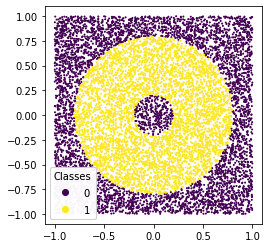

In [3]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
scatter = ax.scatter(train_df.iloc[:,0], train_df.iloc[:,1], c=train_df.iloc[:,2], s=1)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax.add_artist(legend1)
plt.show()

### Exploring Test Data

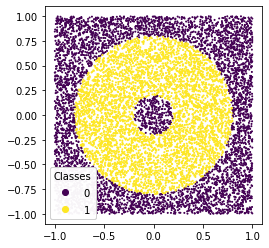

In [4]:
fig, ax2 = plt.subplots()
ax2.set_aspect('equal', 'box')
scatter2 = ax2.scatter(test_df.iloc[:,0], test_df.iloc[:,1], c=test_df.iloc[:,2], s=1)
# produce a legend with the unique colors from the scatter
legend2 = ax2.legend(*scatter2.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax2.add_artist(legend2)
plt.show()

<a id="cross_validation"></a>
## Cross validation

Using [k-fold cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold) in order to find good values for all the parameters of SVM: kernel, and parameters.

------------------------------------------------------------------------
Training for fold 1 ...
Model accuracy: 0.4448


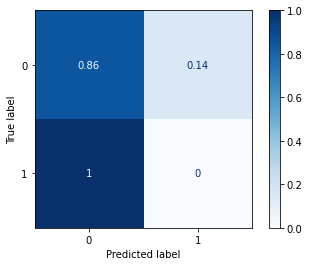

Confusion matrix:
 [[1112  188]
 [1200    0]]
Percentage classification error obtained from validation set: 55.52%
------------------------------------------------------------------------
Training for fold 2 ...
Model accuracy: 0.526


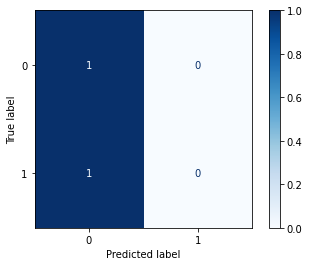

Confusion matrix:
 [[1315    0]
 [1185    0]]
Percentage classification error obtained from validation set: 47.4%
------------------------------------------------------------------------
Training for fold 3 ...
Model accuracy: 0.4584


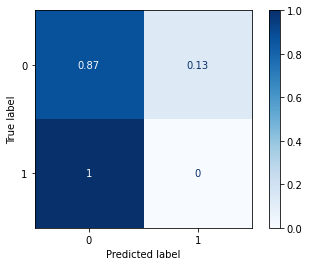

Confusion matrix:
 [[1146  171]
 [1183    0]]
Percentage classification error obtained from validation set: 54.16%
------------------------------------------------------------------------
Training for fold 4 ...
Model accuracy: 0.5084


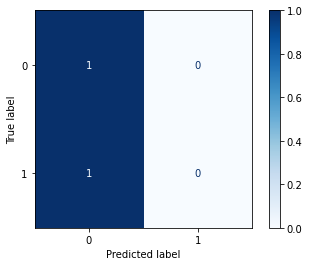

Confusion matrix:
 [[1271    0]
 [1229    0]]
Percentage classification error obtained from validation set: 49.16%

Results of cross validation:
------------------------------------------------------------------------
Percentage classification error obtained from validation set per fold
------------------------------------------------------------------------
> Fold 1 - 55.52%
------------------------------------------------------------------------
> Fold 2 - 47.4%
------------------------------------------------------------------------
> Fold 3 - 54.16%
------------------------------------------------------------------------
> Fold 4 - 49.16%
------------------------------------------------------------------------
Mean percentage classification error obtained from cross validation:
> 51.559999999999995% (+- 3.372951230006151)
------------------------------------------------------------------------


In [5]:
X_train = train_df[['x', 'y']].to_numpy()
y_train = train_df['C'].to_numpy()

fold_no = 1

cv_percentage_classification_errors = list()

# 4-fold cross-validation
kf = KFold(n_splits=4)
for train, validation in kf.split(X_train):
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Create model
    clf = LinearRegression()
    
    # Training (use k-1 subsets to train the model)
    clf.fit(X_train[train], y_train[train])

    # Validation (predict over the remaining validation subset)
    y_pred = clf.predict(X_train[validation])
    
    # Use a threshold to select the probabilities that will determine class 0 or 1
    threshold = 0.5
    y_pred = np.where(y_pred > threshold, 1,0)
    
    # Evaluate by means of accuracy
    accuracy = accuracy_score(y_train[validation], y_pred)
    print(f'Model accuracy: {accuracy}')
    
    # Evaluate by means of a confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_train[validation], y_pred,
                                                    cmap=plt.cm.Blues,
                                                    normalize='true')
    plt.show()

    cm = confusion_matrix(y_train[validation], y_pred)
    print('Confusion matrix:\n', cm)

    # Calculate the percentage classification error obtained from validation test
    percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
    print(f'Percentage classification error obtained from validation set: {percentage_classification_error}%')
    
    cv_percentage_classification_errors.append(percentage_classification_error)

    # Increase fold number
    fold_no = fold_no + 1

print('\nResults of cross validation:')
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Percentage classification error obtained from validation set per fold')
for i in range(0, len(cv_percentage_classification_errors)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - {cv_percentage_classification_errors[i]}%')
print('------------------------------------------------------------------------')
# Calculate the mean percentage classification error obtained from cross-validation
print('Mean percentage classification error obtained from cross validation:')
print(f'> {np.mean(cv_percentage_classification_errors)}% (+- {np.std(cv_percentage_classification_errors)})')
print('------------------------------------------------------------------------')

<a id="training"></a>
## Training (fit the model)

In [6]:
# Create model
clf = LinearRegression()

# Training
clf.fit(X_train, y_train)

LinearRegression()

<a id="test"></a>
## Test (evaluate the model)

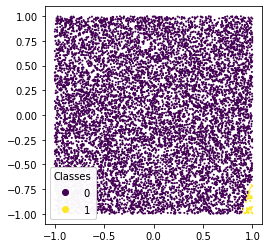

Model accuracy: 0.5289


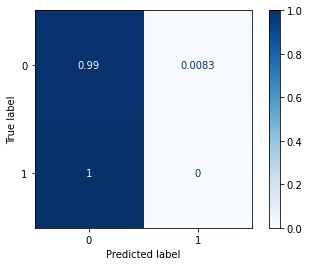

Confusion matrix:
 [[5289   44]
 [4667    0]]
Percentage classification error obtained from test set: 47.11%


In [7]:
X_test = test_df[['x', 'y']].to_numpy()
y_test = test_df['C'].to_numpy()

# Generate predictions
y_pred = clf.predict(X_test)

# Use a threshold to select the probabilities that will determine class 0 or 1
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)

# Visualize predictions
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
scatter = ax.scatter(X_test[:,[0]], X_test[:,[1]], c=y_pred, s=1)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax.add_artist(legend1)
plt.show()

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

# Evaluate by means of a confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                               cmap=plt.cm.Blues,
                                               normalize='true')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Calculate the percentage classification error obtained from test set
percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
print(f'Percentage classification error obtained from test set: {percentage_classification_error}%')

In [8]:
ring_mlr_results = {'real_value': y_test,
                    'prediction': y_pred}
  
df = pd.DataFrame(ring_mlr_results)

df.to_csv('ring_mlr_results.csv')

<a id="references"></a>
## References:

Linear Regression:

- Classification in Python with Scikit-Learn and Pandas: https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/